<a href="https://colab.research.google.com/github/Stacy067/Deep-learning-and-Tensorflow/blob/main/%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_(Gradient_Descent)_(%EC%8B%A4%EC%8A%B5)%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사하강법 (Gradient Descent)

기본 개념은 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 극값에 이를 때까지 반복시키는 것입니다.

**비용 함수 (Cost Function 혹은 Loss Function)를 최소화**하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식입니다.

In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

Image(url='https://img.pngio.com/scikit-learn-batch-gradient-descent-versus-stochastic-gradient-descent-png-592_319.png')

## 샘플에 활용할 데이터 셋 만들기

In [ ]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=15)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

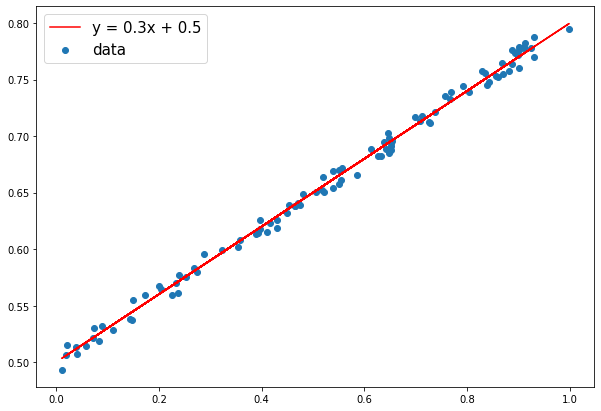

w: 0.3, b: 0.5


In [ ]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

w, b 값에 대하여 random한 초기 값을 설정해 줍니다.

In [ ]:
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

w, b

(0.9336515754448802, 0.29837630889625844)

`y_hat`은 `prediction`은 값 입니다. 즉, 가설함수에서 실제 값 (y)를 뺀 함수를 정의합니다.

In [ ]:
# 코드를 입력해 주세요
y_hat = w * x + b

## 오차(Error) 정의

Loss Function 혹은 Cost Function을 정의 합니다.

Loss (Cost) Function은 예측값인 `y_hat`과 `y`의 차이에 **제곱의 평균**으로 정의합니다.

제곱은 오차에 대한 음수 값을 허용하지 않으며, 이는 **Mean Squared Error(MSE)**인 평균 제곱 오차 평가 지표와 관련 있습니다.

In [ ]:
# 코드를 입력해 주세요
error = ((y_hat - y)**2).mean()

## 학습률 (Learning Rate)

In [ ]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png', width=750)

한 번 학습할 때 **얼마만큼 가중치(weight)를 업데이트** 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 **자칫 Error가 수렴하지 못하고 발산**할 수 있으며,

너무 작은 학습률은 가중치 갱신이 작게 되어 **가중치 갱신이 충분히 되지 않고, 학습이 끝나** 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다.



## Gradient Descent 구현 (단항식)

In [ ]:
# 최대 반복 횟수
num_epoch = 500

# 학습율 (learning_rate)
learning_rate = 0.5

In [ ]:
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # 코드를 입력해 주세요
    y_hat = w*x + b

    # 코드를 입력해 주세요
    error = ((y_hat - y)**2).mean()
    if error < 0.00005:
        break

    # 코드를 입력해 주세요
    w = w - learning_rate * ((y_hat - y)*x).mean()
    b = b - learning_rate * (y_hat -y).mean()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.42256, b = 0.27412 error = 0.20141
 5 w = 0.46270, b = 0.40647 error = 0.00225
10 w = 0.44021, b = 0.42007 error = 0.00166
15 w = 0.42060, b = 0.43123 error = 0.00123
20 w = 0.40376, b = 0.44082 error = 0.00092
25 w = 0.38930, b = 0.44905 error = 0.00069
30 w = 0.37688, b = 0.45612 error = 0.00052
35 w = 0.36621, b = 0.46220 error = 0.00039
40 w = 0.35705, b = 0.46741 error = 0.00030
45 w = 0.34918, b = 0.47189 error = 0.00023
50 w = 0.34243, b = 0.47574 error = 0.00018
55 w = 0.33662, b = 0.47904 error = 0.00014
60 w = 0.33164, b = 0.48188 error = 0.00011
65 w = 0.32736, b = 0.48431 error = 0.00009
70 w = 0.32369, b = 0.48641 error = 0.00008
75 w = 0.32053, b = 0.48820 error = 0.00007
80 w = 0.31782, b = 0.48975 error = 0.00006
85 w = 0.31549, b = 0.49107 error = 0.00005
------------------------------------------------------------
86 w = 0.3, b = 0.5 error = 0.00005


**시각화**

학습 진행(epoch)에 따른 오차를 시각화 합니다.

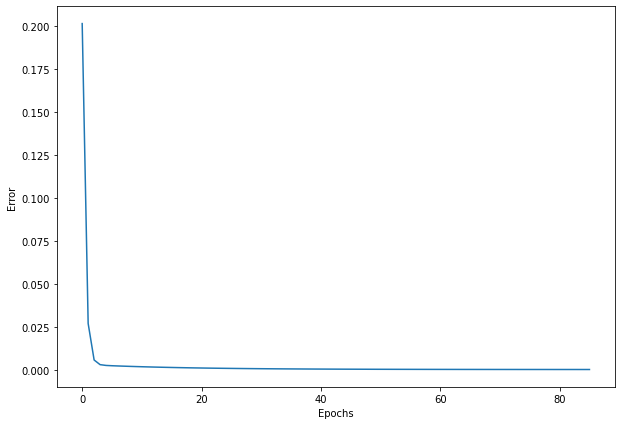

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()